<font colors=black, size='5'> Analyzing Denver's Crime Data</font>

### Neil Oza
</font>



<font size='3'><b>Introduction</b></font>

Hello, my name is Neil Oza. I lived in the city of Denver up until two months ago, and I am currently honing my data science skills. For practice and fun, I decided to see what information I could gleam from Denver's publicly available crime data. I will create some visualizations to help discover trends within the data. My goal is to organize this data in a way that would help law enforcement in Denver allocate their resources more efficiently. let's get started! 



<b><font size=3>Preparing the Data</font></b>

In this section, I will prepare The data for analysis and check for any errors or missing values.
<br>
<br>

In [402]:
#Start by importing some useful packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
import numpy as np
import folium
from folium import plugins


In [375]:
#Next, read in the data, publicly available at https://www.denvergov.org/opendata/dataset/city-and-county-of-denver-crime
denver_data=pd.read_csv('/users/neiloza/Downloads/crime.csv', parse_dates=True)
denver_data.head(50)

,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,INCIDENT_ADDRESS,GEO_X,GEO_Y,GEO_LON,GEO_LAT,DISTRICT_ID,PRECINCT_ID,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,2016376978,2016376978521300,5213,0,weapon-unlawful-discharge-of,all-other-crimes,6/15/2016 11:31:00 PM,NaN,6/15/2016 11:31:00 PM,NaN,3193983.0,1707251.0,-104.809881,39.773188,5,521,montbello,1,0
1,20186000994,20186000994239900,2399,0,theft-other,larceny,10/11/2017 12:30:00 PM,10/11/2017 4:55:00 PM,1/29/2018 5:53:00 PM,NaN,3201943.0,1711852.0,-104.781434,39.785649,5,522,gateway-green-valley-ranch,1,0
2,20166003953,20166003953230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,3/4/2016 8:00:00 PM,4/25/2016 8:00:00 AM,4/26/2016 9:02:00 PM,2932 S JOSEPHINE ST,3152762.0,1667011.0,-104.957381,39.663490,3,314,wellshire,1,0
3,201872333,201872333239900,2399,0,theft-other,larceny,1/30/2018 7:20:00 PM,NaN,1/30/2018 10:29:00 PM,705 S COLORADO BLVD,3157162.0,1681320.0,-104.941440,39.702698,3,312,belcaro,1,0
4,2017411405,2017411405230300,2303,0,theft-shoplift,larceny,6/22/2017 8:53:00 PM,NaN,6/23/2017 4:09:00 PM,2810 E 1ST AVE,3153211.0,1686545.0,-104.955370,39.717107,3,311,cherry-creek,1,0
5,201872837,201872837549900,5499,0,traf-other,all-other-crimes,1/31/2018 12:44:00 AM,NaN,1/31/2018 1:29:00 AM,2100 BLOCK E 17TH AVE,3151310.0,1696020.0,-104.961928,39.743149,6,622,city-park-west,1,0
6,20186001015,20186001015230400,2304,0,theft-parts-from-vehicle,theft-from-motor-vehicle,6/1/2017 12:15:00 PM,1/26/2018 12:15:00 PM,1/26/2018 12:24:00 PM,995 N FEDERAL BLVD,3133441.0,1692147.0,-105.025543,39.732790,1,122,villa-park,1,0
7,201870628,201870628570700,5707,0,criminal-trespassing,all-other-crimes,1/30/2018 7:40:00 AM,NaN,1/30/2018 10:33:00 AM,E SPEER BLVD / N GRANT ST,3145202.0,1688799.0,-104.983794,39.723424,3,311,speer,1,0
8,201870833,201870833540100,5401,0,traffic-accident-hit-and-run,traffic-accident,1/30/2018 9:10:00 AM,NaN,1/30/2018 9:17:00 AM,W 13TH AVE / N CHEROKEE ST,3142965.0,1693682.0,-104.991650,39.736863,6,611,civic-center,0,1
9,20186001048,20186001048230500,2305,0,theft-items-from-vehicle,theft-from-motor-vehicle,1/31/2018 12:55:00 AM,1/31/2018 6:55:00 AM,1/31/2018 7:07:00 AM,2828 N ZUNI ST,3136231.0,1701209.0,-105.015451,39.757627,1,113,highland,1,0


<br>
There are a total of 19 columns in this dataset. I reached out to the city of Denver and received clarification on several of the columns. I will briefly describe each column below. I will go slightly out of order to provide a more cohesive explanation
<br>
<br>
<b>OFFENSE_ID</b> is a unique identifier for each offense. It is generated by concatanating (combining) the INCIDENT_ID, OFFENSE_CODE,and OFFENSE_CODE_EXTENSION. It provides a unique identifier for each offense, as the INCIDENT_ID is duplicated if multiple offenses are committed at once, and OFFENSE_CODE and OFFENSE_CODE_EXTENSION will repeat whenever a particular type of offense is committed

<b>INCIDENT_ID</b> is a unique identifier for an occurence of offenses. most OFFENSE_ID's have unique INCIDENT_ID's, but when a person commits multiple offenses at once, e.g. liquor possession and heroine possession, multiple OFFENSE_ID's will be generated from the INCIDENT_ID

<b>OFFENSE_CODE</b> is a unique identifier for a particular type of offense. things such as criminal mischief, trespassing, larceny, etc. all have different OFFENSE__CODE values to identify them

<b>OFFENSE_CODE_EXTENSION</b> are used to describe a subset of another type crime. for example criminal_mischief- motor vehicle and criminal_mischief-other have the same OFFENSE_CODE but different extensions to differentiate them

<b>OFFENSE_TYPE_ID</b> provides the actual name for the offense in lamens terms. each combination of OFFENSE_CODE and OFFENSE_EXTENSION reference a unique crime. contents of this column include things such as theft-shoplift, criminal-trespassing, and threats-to-injure

<b>OFFENSE_TYPE_CATEGORY</b> provides a more general categorization for crimes. for example, theft-shoplift and theft-from-bldg are both forms of larceny

<b>FIRST_OCCURENCE_DATE</b> is the first possible date/time of the offense. if the time of the offense is known, the LAST_OCCURENCE_DATE will have value NaN. if the time is not known, FIRST_OCCURENCE_DATE will note the first possible time for the offense, and LAST_OCCURENCE_DATE will be last possible time of the offense. This commonly occurs with burglaries, where the exact time of the offense may not be known, but a range of time is known

<b>LAST_OCCURENCE_DATE</b> will be NaN if the exact time of the offense is known and will be an actual time if only a range of possible times is known. in the latter case, it will be the last possible time the offense could have occured.

<b>REPORTED_DATE</b> is the time at which the offense was reported to the police

<b>INCIDENT_ADDRESS</b> provides the location of the offense. not all entries have a value for this column for privacy reasons

<b>GEO_LON</b> and <b>GEO_LAT</b> are the latitudes and longitudes of the location of the offense

<b>GEO_X</b> and <b>GEO_Y</b> are the state plane (city of Denver standard projection) for the offense location. functionally simlar to GEO_LON and GEO_LAT

<b>DISTRICT_ID</b> is the district in charge of handling the offense

<b>PRECINCT_ID</b> is the precinct in charge of handling the offense

<b>NEIGHBORHOOD_ID</b> is the neighborhood the offense occurred in

<b>IS_CRIME</b> states whether the offense was a crime

<b>IS_TRAFFIC</b> states whether the offense was a traffic incident




<br>
<br>
That was an overview of the columns in our dataset. Next I'll make sure the data is clean. To do that, we will check for null values and check for inconsistencies in the data. I'll start by checking for null values

In [19]:
denver_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455872 entries, 0 to 455871
Data columns (total 19 columns):
INCIDENT_ID               455872 non-null int64
OFFENSE_ID                455872 non-null int64
OFFENSE_CODE              455872 non-null int64
OFFENSE_CODE_EXTENSION    455872 non-null int64
OFFENSE_TYPE_ID           455872 non-null object
OFFENSE_CATEGORY_ID       455872 non-null object
FIRST_OCCURRENCE_DATE     455872 non-null object
LAST_OCCURRENCE_DATE      144476 non-null object
REPORTED_DATE             455872 non-null object
INCIDENT_ADDRESS          411003 non-null object
GEO_X                     452166 non-null float64
GEO_Y                     452166 non-null float64
GEO_LON                   452166 non-null float64
GEO_LAT                   452166 non-null float64
DISTRICT_ID               455872 non-null int64
PRECINCT_ID               455872 non-null int64
NEIGHBORHOOD_ID           455872 non-null object
IS_CRIME                  455872 non-null int64
IS_TRAFFIC

Based on the above output, many of the columns have identical numbers of non-null data. this suggests that our data is generally clean. We seem to have 455872 entries in our dataset, with the LAST_OCCURENCE_DATE column and some of the location columns having null values. This makes sense, as a lot of crimes do not have last occurence dates, and sexual assualt cases never have their addresses published for privacy considerations.


Now I'll make sure the data is consistent. Namely, I want to make sure every OFFENSE_CODE and OFFENSE_CODE_EXTENSION combination has a unique OFFENSE_TYPE_ID; if code 4101 sometimes means liquor-sell and other times meant kidnap-dv, it would suggest there are errors in the data. we will use groupby to make sure each code and extension references exactly one type of crime.

In [441]:
temp=display(denver_data.groupby([denver_data.OFFENSE_CODE,denver_data.OFFENSE_CODE_EXTENSION,denver_data.OFFENSE_TYPE_ID]).size())
pd.set_option('display.max_rows',500)
print(temp)
pd.set_option('display.max_rows',50)

OFFENSE_CODE  OFFENSE_CODE_EXTENSION  OFFENSE_TYPE_ID              
902           0                       homicide-family                     21
910           0                       homicide-negligent                   2
912           0                       homicide-other                     216
1006          0                       kidnap-adult-victim                209
              1                       kidnap-dv                          161
1099          0                       false-imprisonment                 364
1102          0                       sex-aslt-rape                     2145
              1                       sex-aslt-rape-pot                  134
1109          0                       sex-aslt-non-rape                  503
              1                       sex-aslt-non-rape-pot              116
1199          0                       sex-aslt-w-object                   25
              1                       sex-aslt-w-object-pot                5
1202    

None


Some offense codes have multiple extensions as indicated by the blank spaces in the OFFENSE_CODE column, but every offense code and extension pair has exactly one offense type id. There are no inconsistencies in categorization.
<br>
Next I'll make sure all of the dates are consistent. As a rule, First Occurence Date should come first, Last Occurence Date should come second or not exist, and Reported date should come last. If this is not the case for a particular row, that row may need to be corrected.

In [49]:
#convert relevant column data into datetime objects
denver_data['REPORTED_DATE']=pd.to_datetime(denver_data.REPORTED_DATE)
denver_data['FIRST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.FIRST_OCCURRENCE_DATE)
denver_data['LAST_OCCURRENCE_DATE']=pd.to_datetime(denver_data.LAST_OCCURRENCE_DATE)


In [292]:
# Calculate the time difference between first and last occurence date. negative time means the Last Occurence is dated
# before first occurence. those entries have been listed with OFFENSE_ID for easy access
temp=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
temp.loc[:,'OCCURENCE_WINDOW']=temp.LAST_OCCURRENCE_DATE-temp.FIRST_OCCURRENCE_DATE
temp.loc[:,'OCCURENCE_WINDOW']=temp.OCCURENCE_WINDOW.fillna(0)
temp[temp['OCCURENCE_WINDOW']<'0']

,OFFENSE_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,OCCURENCE_WINDOW
43496,2014388104570700,2014-07-26 11:19:00,2014-07-26 10:50:00,2014-07-26 11:19:00,-1 days +23:31:00
44094,2014373704299901,2014-07-19 05:00:00,2014-07-19 04:00:00,2014-07-19 05:27:00,-1 days +23:00:00
50290,2014353737299901,2014-07-09 03:45:00,2014-07-09 02:46:00,2014-07-09 11:09:00,-1 days +23:01:00
53619,2014399282240400,2014-08-01 08:22:00,2014-08-01 06:45:00,2014-08-01 08:22:00,-1 days +22:23:00
62418,2014596887131302,2014-11-08 22:45:00,2014-11-08 22:30:00,2014-11-08 22:49:00,-1 days +23:45:00
67451,20149515342240400,2014-07-28 18:27:00,2014-07-28 07:00:00,2014-07-29 18:27:00,-1 days +12:33:00
100205,2015539465240400,2015-09-17 12:46:00,2015-09-17 08:30:00,2015-09-17 13:56:00,-1 days +19:44:00
111140,201594326239900,2015-02-16 17:55:00,2015-02-16 16:20:00,2015-02-17 17:50:00,-1 days +22:25:00
121863,2015752334570700,2015-12-29 23:30:00,2015-12-29 03:30:00,2015-12-30 00:36:00,-1 days +04:00:00
124008,2016151736355000,2016-03-10 04:15:00,2016-03-10 03:50:00,2016-03-10 04:15:00,-1 days +23:35:00


39 entries have last occurence dates that are earlier than first occurence dates. Based on the occurence window, the first and last occurence days should be flipped. The errors seem to be minor, so the data is still usable

In [443]:
temp=denver_crime[['OFFENSE_ID','FIRST_OCCURRENCE_DATE','LAST_OCCURRENCE_DATE','REPORTED_DATE']]
temp.loc[:,'OCC_REPORT_GAP']=temp.REPORTED_DATE-temp.LAST_OCCURRENCE_DATE
temp.loc[:,'OCC_REPORT_GAP']=temp.OCC_REPORT_GAP.fillna(temp.REPORTED_DATE-temp.FIRST_OCCURRENCE_DATE)
temp[temp['OCC_REPORT_GAP']<'0']


,OFFENSE_ID,FIRST_OCCURRENCE_DATE,LAST_OCCURRENCE_DATE,REPORTED_DATE,OCC_REPORT_GAP
8833,2018425958131600,2018-06-25 10:20:00,2018-06-25 14:47:00,2018-06-25 13:56:00,-1 days +23:09:00
16621,2018409124549900,2018-06-18 17:29:00,2018-06-18 19:51:00,2018-06-18 18:00:00,-1 days +22:09:00
51546,2014436425357200,2014-08-19 19:20:00,2014-08-19 22:11:00,2014-08-19 21:47:00,-1 days +23:36:00
51547,2014436425351200,2014-08-19 19:20:00,2014-08-19 22:11:00,2014-08-19 21:47:00,-1 days +23:36:00
60052,2014560314580100,2014-10-21 17:47:00,2014-10-21 20:42:00,2014-10-21 18:19:00,-1 days +21:37:00
68219,2014523161549900,2014-10-02 18:43:00,2014-10-02 20:32:00,2014-10-02 18:55:00,-1 days +22:23:00
79538,2014615636240400,2014-11-19 07:15:00,2014-11-19 07:20:00,2014-11-19 07:15:00,-1 days +23:55:00
92102,2015279235501500,2015-05-21 16:29:00,2015-05-21 17:32:00,2015-05-21 16:29:00,-1 days +22:57:00
114628,201597530239900,2015-02-10 20:12:00,2015-02-19 20:12:00,2015-02-19 11:45:00,-1 days +15:33:00
123693,201628962545500,2016-01-14 20:34:00,2016-01-14 20:52:00,2016-01-14 20:34:00,-1 days +23:42:00


The above entries have Reported dates after the Last Occurence Dates.These entries should be reveiwed for mistakes, but once again the error in these entries is less than 24 hours, so I consider the data still usable.
<br>
<br>
Now Lets make sure all of the Offense id's are properly constructed from the Incident id, offense code, and offense extension


In [488]:
#Determine if there are mistakes in the OFFENSE_ID column
#prepare the columns
temp=denver_data[['OFFENSE_ID','INCIDENT_ID','OFFENSE_CODE','OFFENSE_CODE_EXTENSION']]
temp.OFFENSE_ID=temp.OFFENSE_ID.astype(str)
temp.INCIDENT_ID=temp.INCIDENT_ID.astype(str)
#the below two columns have to be homogonized to 4 digits and 2 digits respectively
temp.OFFENSE_CODE=temp.OFFENSE_CODE.map('{:04d}'.format).astype(str)
temp.OFFENSE_CODE_EXTENSION=temp.OFFENSE_CODE_EXTENSION.map('{:02d}'.format).astype(str)
#Combine the composite columns and check to make sure it's the same as the OFFENSE_ID
temp['COMBINED_ID']=temp.INCIDENT_ID+temp.OFFENSE_CODE+temp.OFFENSE_CODE_EXTENSION
temp['ID_MATCH']=temp.COMBINED_ID==temp.OFFENSE_ID
#print all rows which have mistakes. will return no rows if there are no errors
temp[temp['ID_MATCH']==False]



/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


          OFFENSE_ID  INCIDENT_ID OFFENSE_CODE OFFENSE_CODE_EXTENSION  \
0   2016376978521300   2016376978         5213                     00   
1  20186000994239900  20186000994         2399                     00   
2  20166003953230500  20166003953         2305                     00   
3    201872333239900    201872333         2399                     00   
4   2017411405230300   2017411405         2303                     00   

         COMBINED_ID  ID_MATCH  
0   2016376978521300      True  
1  20186000994239900      True  
2  20166003953230500      True  
3    201872333239900      True  
4   2017411405230300      True  


,OFFENSE_ID,INCIDENT_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,COMBINED_ID,ID_MATCH


Since there was no output, that means there were no errors. All of the Offense ID's are correctly composed. 

Finally, I am only going to analyze crimes in this EDA, so I'll filter out all of the traffic incidents.

In [ ]:
denver_crime=denver_data[denver_data['IS_CRIME']==1]
denver_crime=denver_crime[denver_crime['REPORTED_DATE']<'2019']


denver_crime.info()


<br>
<br>
<br>
<font size=3><b>Preliminary Analysis</b></font>

Now that the data's been primed, I will begin my analysis. To start, I'll get a general overview of Denver's crime trend over the past few years and the types of crimes being committed

<br>

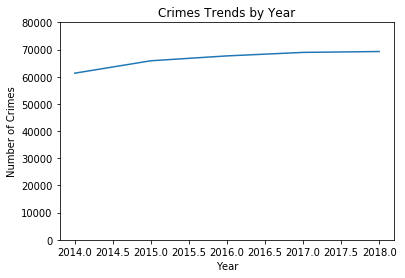

In [101]:
denver_crime['REPORTED_DATE'].groupby(denver_crime.REPORTED_DATE.dt.year).agg('count').plot('line')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.title('Crimes Trends by Year')
plt.ylim(bottom=0,top=80000)
plt.show()

There is a slight upward trend in crime over the past five years

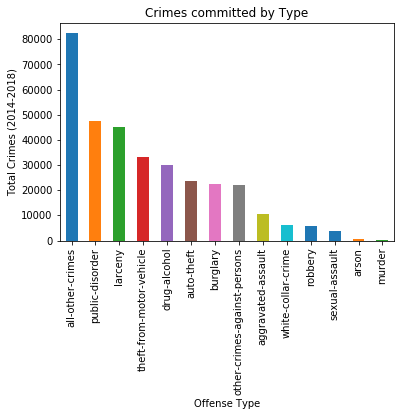

In [57]:
denver_crime['OFFENSE_CATEGORY_ID'].value_counts().plot(kind='bar')
plt.title('Crimes Committed by Type')
plt.xlabel('Offense Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

Most crimes in Denver relate to theft of some kind, public disorder, drugs/alcohol, or fall into the category of all-other-crimes. Violent crimes seem to uncommon, which is a good sign. There are two compostie categories in our dataset: all-other-crimes and other-crimes-against-persons. let's take a closer look at them

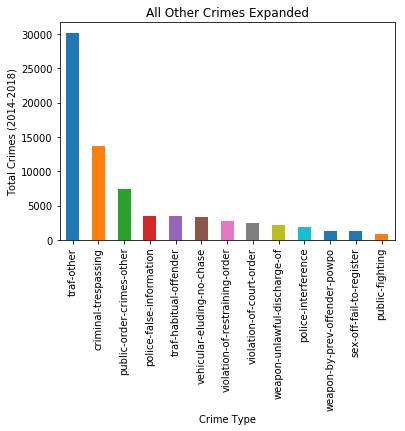

In [489]:
#only listing the top thirteen subdivisions of 'all-other-crimes', for sake of space
denver_misc_crimes=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes'].OFFENSE_TYPE_ID.value_counts().head(13).plot(kind='bar')
plt.title('All Other Crimes Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')
plt.show()

Most of the crimes in this composite category are traffic related, with trespassing as the other large category.

Text(0, 0.5, 'Total Crimes (2014-2018)')

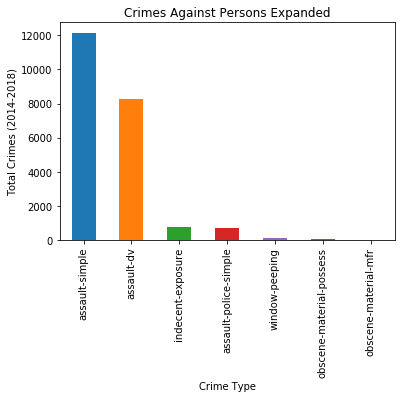

In [167]:
denver_misc_crimes=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='other-crimes-against-persons'].OFFENSE_TYPE_ID.value_counts().plot(kind='bar')
plt.title('Crimes Against Persons Expanded')
plt.xlabel('Crime Type')
plt.ylabel('Total Crimes (2014-2018)')

other-crimes-against-persons are usually assualts of some form. the other offense types comprise well under 10% of the category. 

<font size=3><b> Crimes Viewed through Various Timeframes</b></font>

I'll now ake a look at crime trends temporally to determine if certain crimes are more prevalent in different seasons, hours of the day, or days of the week, or in different years

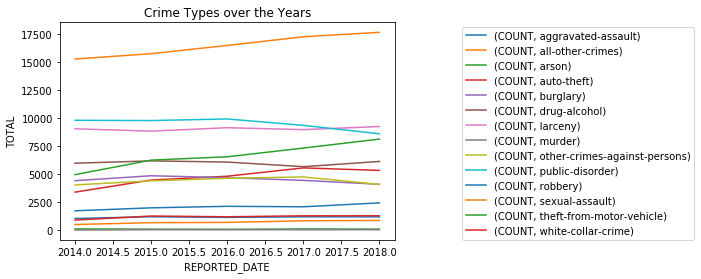

In [321]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.year, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('Crime Types over the Years')
plt.show()


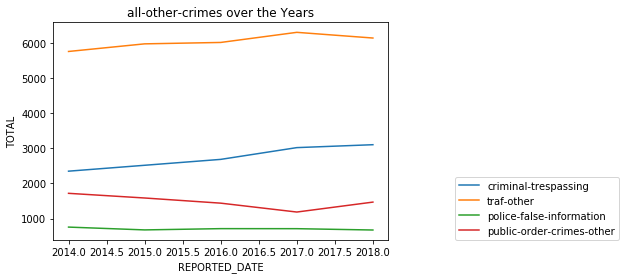

In [322]:
temp=denver_crime[denver_crime['OFFENSE_CATEGORY_ID']=='all-other-crimes']
temp=temp[['REPORTED_DATE','OFFENSE_TYPE_ID']].groupby([temp.OFFENSE_TYPE_ID, temp.REPORTED_DATE.dt.year]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=0)
temp['COUNT'][['criminal-trespassing','traf-other','police-false-information','public-order-crimes-other']].plot(kind='line')
plt.legend(loc=(1.2,0))
plt.ylabel('TOTAL')
plt.title('all-other-crimes over the Years')
plt.show()


The above graphs show the chaange in total crimes over the past five years for each type of crime. There are notable increases in theft-from-motor-vehicle, auto-theft, and all-other-crimes, and a notable decrease in public-disorder. all other crime rates have mostly stayed level. Next, let's take a look at crime by month. this should tell us if certain crimes are mre prevalent in certain seasons

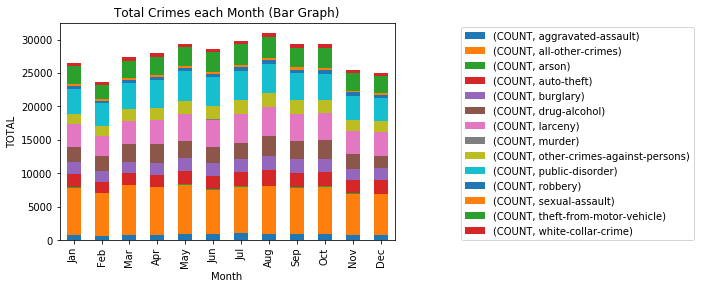

In [491]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.month, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month (Bar Graph)')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'))
plt.show()

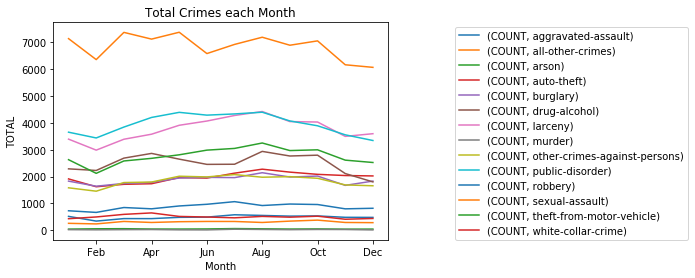

In [490]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.month, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Total Crimes each Month')
plt.xlabel('Month')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Feb','Apr','Jun','Aug','Oct','Dec'))

plt.show()

These graphs show that crimes are generally more common in the summer months and less common during the winter. When I analyzed crime by type, I don't see any major trends differing from the overall data.

Next, let's see if certain crimes are more common on certain days of the week

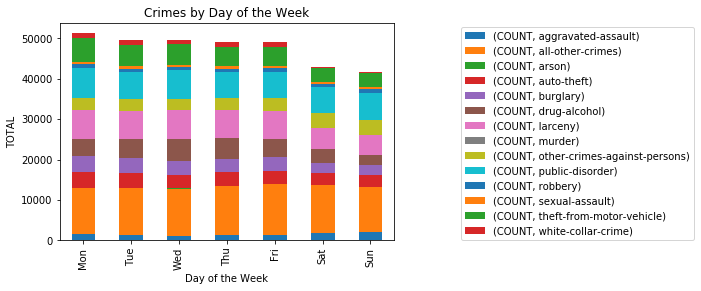

In [211]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.weekday, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='bar',stacked=True)
plt.legend(loc=(1.2,0))
plt.xlabel('Day of the Week(bar graph)')
plt.ylabel('TOTAL')
plt.title('Crimes by Day of the Week')
ax.set_xticklabels(('Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()





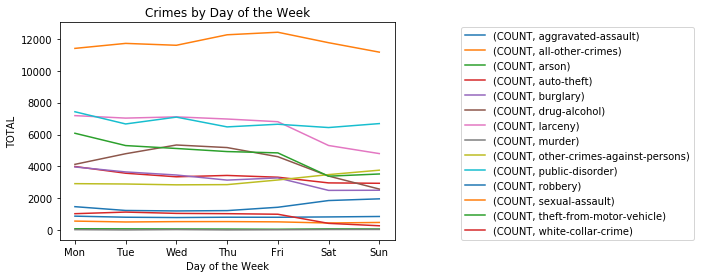

In [210]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.weekday, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp=temp.unstack(level=1)
ax=temp.plot(kind='line')
plt.legend(loc=(1.2,0))
plt.title('Crimes by Day of the Week (line graph)')
plt.xlabel('Day of the Week')
plt.ylabel('TOTAL')
ax.set_xticklabels(('','Mon','Tue','Wed','Thu','Fri','Sat','Sun'))
plt.show()

It seems that crimes are generally more common on weekdays compared to weekends. However, aggravated-assualt and other-crimes-against-persons are both more common on weekend days, which I consider surprising. Of all of the crime types, auto-theft, theft-from-motor-vehicle, drugs-alcohol, and larceny decrease the most on weekend days compared to weekdays

Now let's analyze crimes by hour of the day. with this we can determine if certain types of crimes are more common during the morning or at night. Note that these below charts use military time, so 10 stands for 10 AM and 22 stands for 10 PM

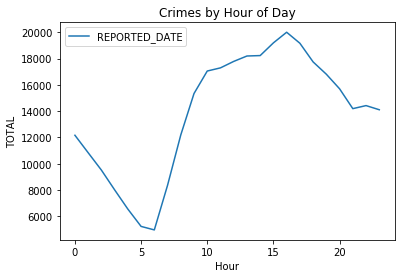

In [492]:
temp=denver_crime[['REPORTED_DATE']].groupby([denver_crime.REPORTED_DATE.dt.hour]).agg('count')
temp.plot(kind='line')
plt.xlabel('Hour')
plt.ylabel('TOTAL')
plt.title('Crimes by Hour of Day')
plt.show()

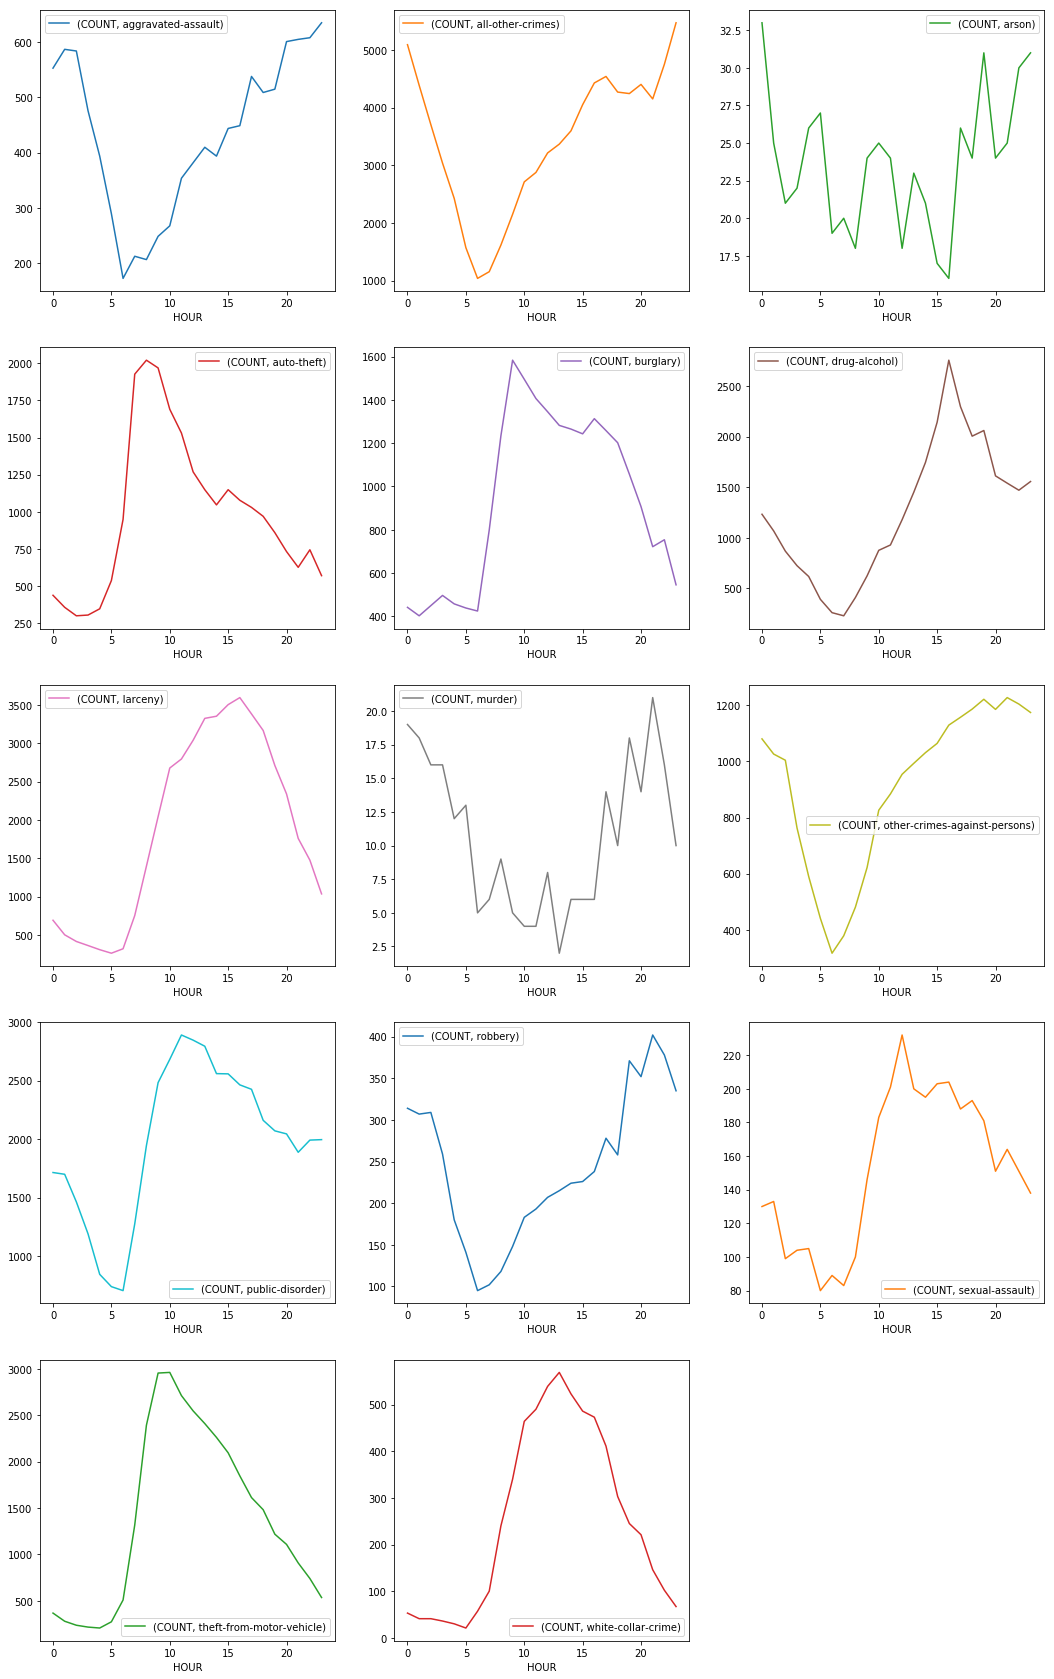

In [493]:
temp=denver_crime[['REPORTED_DATE','OFFENSE_CATEGORY_ID']].groupby([denver_crime.REPORTED_DATE.dt.hour, denver_crime.OFFENSE_CATEGORY_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['COUNT']
temp.index=temp.index.rename('HOUR',level=0)

temp=temp.unstack(level=1)
temp.plot(kind='line', figsize=(18,30),subplots=True,layout=(-1,3),sharex=False,sharey=False)
plt.title('Crimes by the Hour')
plt.show()

There are some interesting trends here. First and formost, it eems like most crimes occur betwwen 8 AM and 8 PM with a noticeable dip in crime from 12 AM to 5 AM. Different types of crimes seem to be prevalent at different times of the day. aggravated-assualt, robbery, and other-crimes-against-persons seem to be most common late at night, betwen 10 PM and 2 AM. Auto-theft, theft-from-notor-vehicle, and larceny seem to be most common from 9 AM to 5 PM, which is also when people are at work. Since thefts have increased significantly over the past five years, reminding people to lock their cars and possessions before going to work may help address some of this crime.

<b><font size=3> Crimes by District</b></font>

Now I'll take a look at crimes by district. I'll start by looking at the total crime in each district each year.

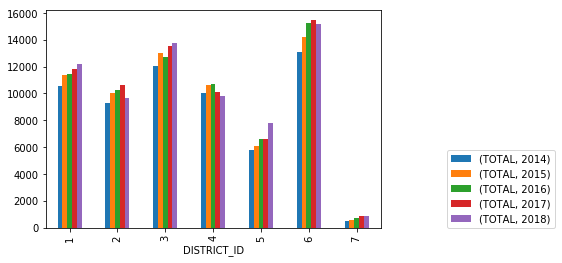

In [122]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID']].groupby([denver_crime.REPORTED_DATE.dt.year, denver_crime.DISTRICT_ID]).agg('count')
temp=temp.drop(labels='REPORTED_DATE',axis=1)
temp.columns=['TOTAL']
temp=temp.unstack(level=0)
temp.plot(kind='bar',stacked=False)
plt.legend(loc=(1.2,0))
plt.show()

Districts 6, 3, and 1 are the largest, while district 7 is the smallest by a large margin. Crime seems to be trending upward over time in every district wih the exception of district 4 and possibly district 2, though in the latters case the data isn't conclusive.

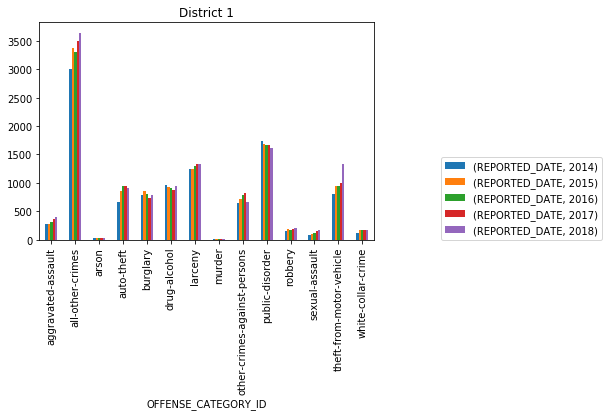

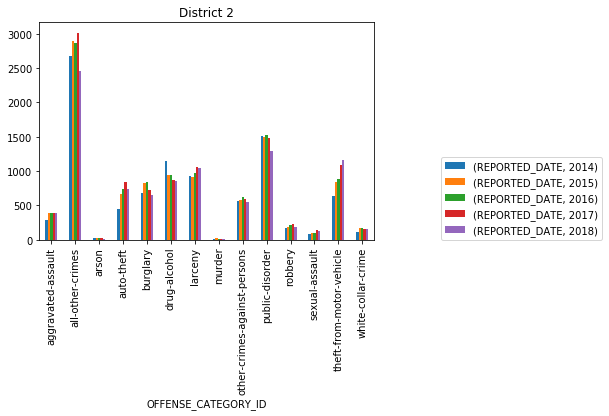

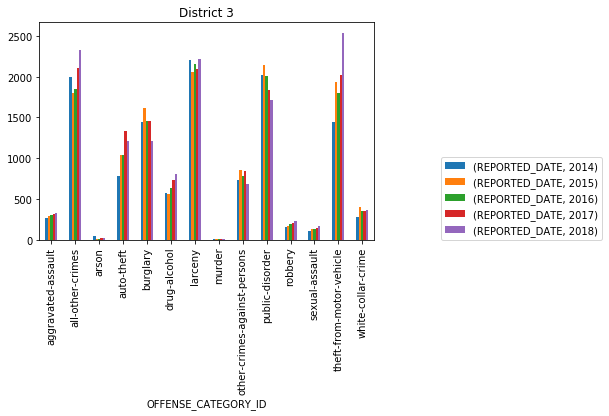

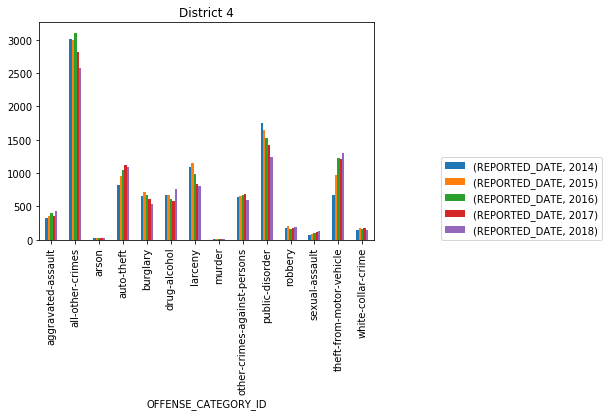

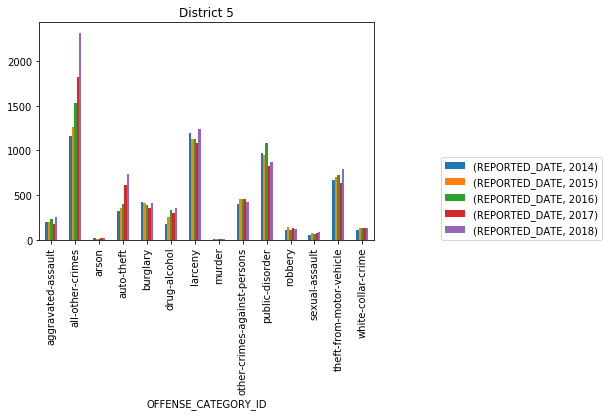

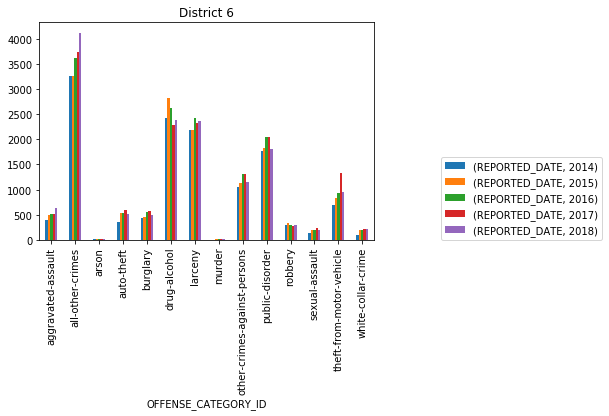

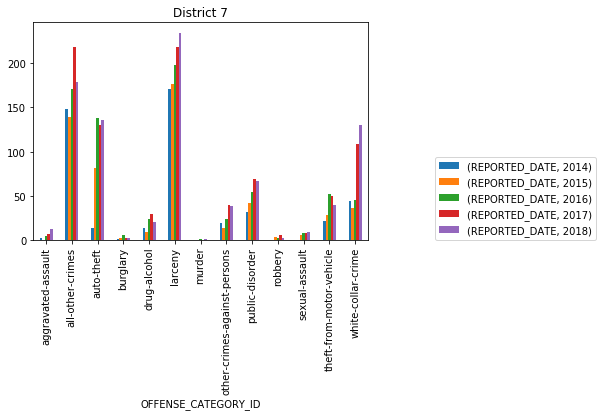

In [249]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for district in range(1,8):
    temp2=temp[temp['DISTRICT_ID']==district].drop('DISTRICT_ID',axis=1)
    temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.OFFENSE_CATEGORY_ID]).agg('count')
    temp2=temp2.unstack(level=0).plot(kind='bar').legend(loc=(1.2,0))
    plt.title('District '+str(district))
    plt.show()
    
    

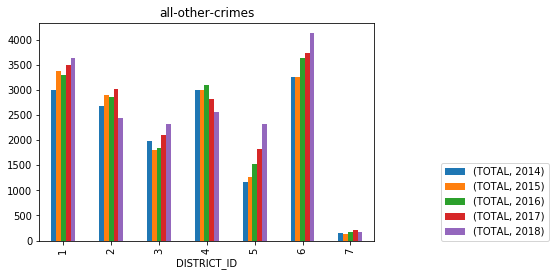

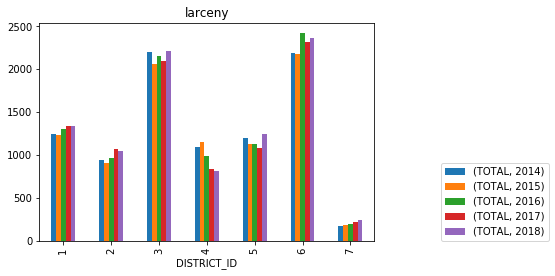

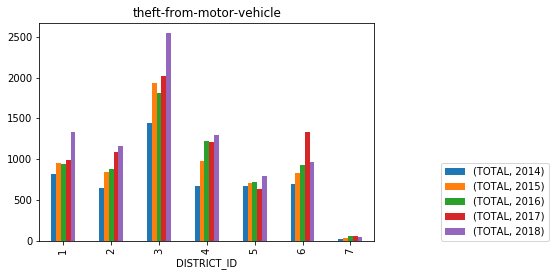

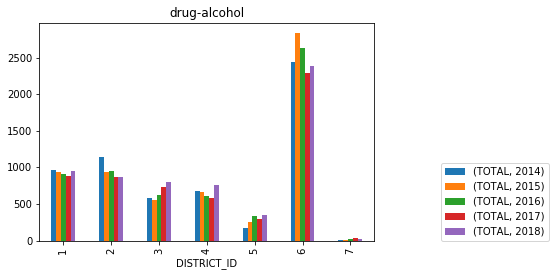

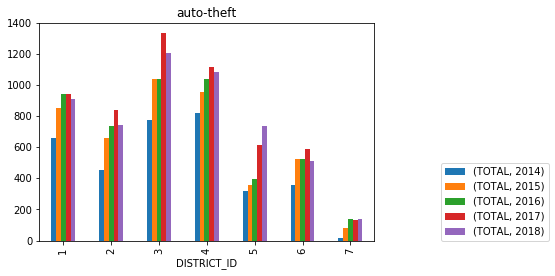

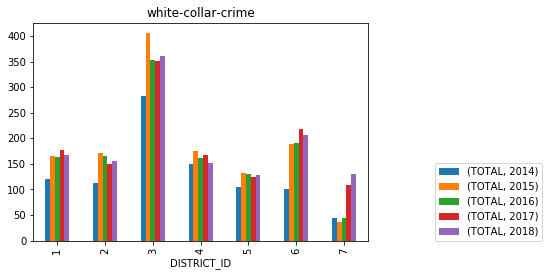

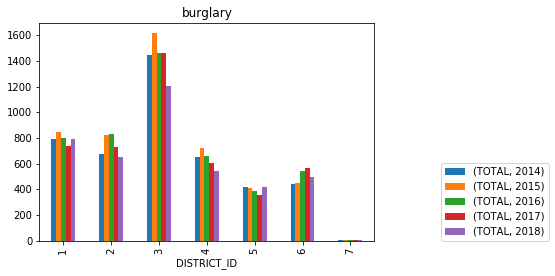

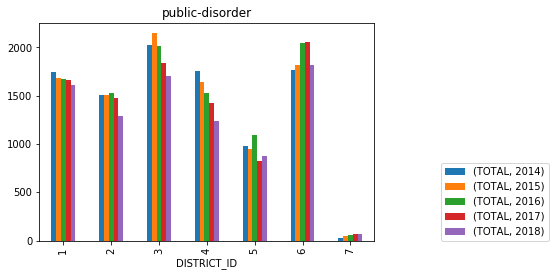

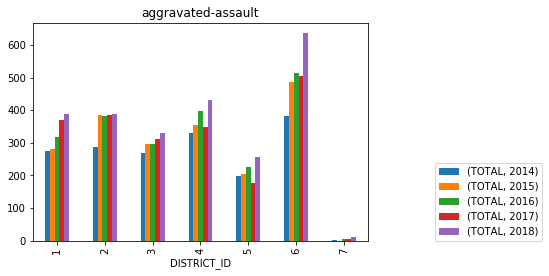

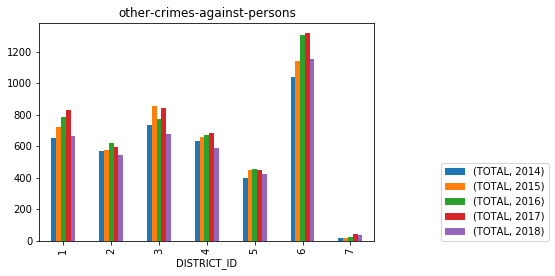

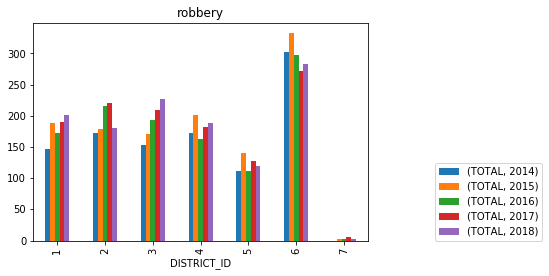

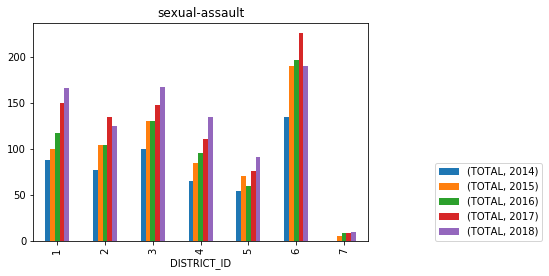

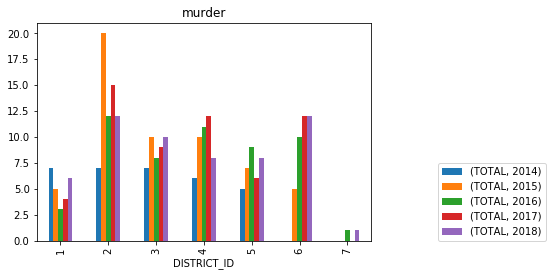

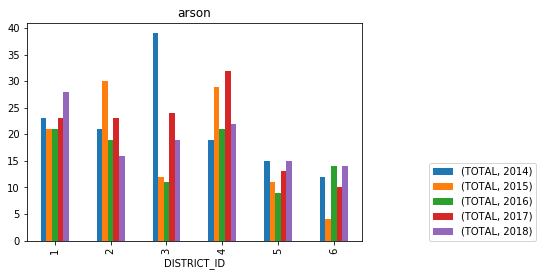

In [251]:
temp=denver_crime[['REPORTED_DATE','DISTRICT_ID','OFFENSE_CATEGORY_ID']]
for offense in denver_crime.OFFENSE_CATEGORY_ID.unique():
    temp2=temp[temp['OFFENSE_CATEGORY_ID']==offense].drop('OFFENSE_CATEGORY_ID', axis=1)
    temp2=temp2=temp2.groupby([temp2.REPORTED_DATE.dt.year,temp2.DISTRICT_ID]).agg('count')
    temp2.columns= ['TOTAL']
    temp2=temp2.unstack(level=0)
    temp2=temp2.plot(kind='bar')
    plt.legend(loc=(1.2,0))
    plt.title(offense)
    


The above two sets of charts break down crime by districts, type and year, though with slightly different groupings. Namely, the first set has an individual graph for each district, while the latter has an individual graph for each type of crime. Looking through this ata, we can see that District 6 seems to be central hub for most drug related crime, while district 3 seems to be the central hub for car related theft. District 2 seems to have a significantly high murder rate which is surprising considering how low crime the area is otherwise

<font size=3><b> Heat Maps</b></font>
    
In this section, You can use the function below to generate your own heatmaps. By typing in the name of an offense category id, you can generate a heatmap for that type of crime in an interactive map of Denver. On the map, no color means no offenses near that location, blue means a few offenses near that location, and red means many offenses near tha location. The function name is heatmap_creator(), and it take's in a single paramater of type of crime. A couple examples have been done for you below. Choose whichever crime your interested in, and generate the heatmap!

In [527]:
def heatmap_creator(label):
    lat_lon_isna=denver_crime['GEO_LAT'].isna()|denver_crime['GEO_LON'].isna()
    m = folium.Map(location=[39.73,-104.90], tiles='Stamen Toner',zoom_start=11, control_scale=True)
    denver_LL_clean=denver_crime[~lat_lon_isna]
    temp=denver_LL_clean[denver_LL_clean['OFFENSE_CATEGORY_ID']==label]
    hm_prep=temp[['GEO_LAT','GEO_LON']].as_matrix()
    m.add_children(plugins.HeatMap(hm_prep,radius=15))
    print(label)
    return display(m)


In [530]:
heatmap_creator('larceny')

/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


larceny


In [529]:
heatmap_creator('auto-theft')

/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/neiloza/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.
  import sys


auto-theft


<font size=5><b>End of EDA</font></b>

Thank you for reading through this exploratory data analysis. I hope you found it useful, and I hope I helped you all uncover a few new patterns. I've also included a heatmap generator in case you want to visualize where the crimes are occuring. Please let me know if there is any additional analysis you would like me to add, and have a great day!